In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Para este bloque vamos a revisar el dataset clásico de MNIST

In [7]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

X_train = np.expand_dims(X_train, -1) # [N, 28, 28, 1]
X_test = np.expand_dims(X_test, -1) 

In [8]:
value_counts = Counter(y_train)
print(value_counts)

Counter({1: 6742, 7: 6265, 3: 6131, 2: 5958, 9: 5949, 0: 5923, 6: 5918, 8: 5851, 4: 5842, 5: 5421})


In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
i = 15
img = X_train[i]

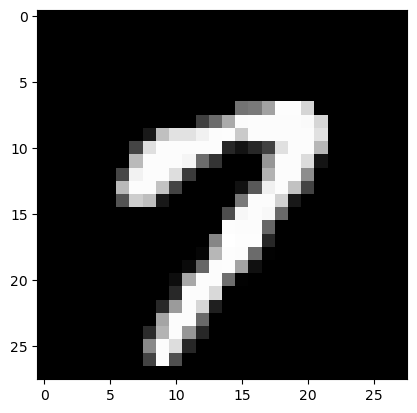

In [12]:
plt.imshow(img, cmap = 'gray')

In [15]:
y_train[i]

7

# Operaciones en una CNN
### 1. Convolución

**Qué hace**: Proceso donde un filtro (o kernel) pequeño —por ejemplo de tamaño 3×3— se desliza sobre la imagen y calcula una combinación ponderada (multiplicación y suma) de los píxeles bajo él.

**Ejemplo**: Si tienes una imagen de 5×5 píxeles y aplicas un filtro 3×3, en cada posición el filtro toma una pequeña porción (3×3) de la imagen, multiplica cada valor por el peso correspondiente del filtro y suma todos esos valores → ese resultado es un nuevo píxel de la imagen salida (el mapa de características).

**Intuición**: Cada filtro aprende a detectar un patrón visual: bordes, texturas, esquinas, etc.
____

### 2. Padding (relleno)

Cuando aplicas una convolución, la imagen se "encoge" (por ejemplo, una imagen 5×5 con filtro 3×3 produce una salida de 3×3). **Padding** sirve para rellenar los bordes de la imagen con ceros (u otros valores), evitando esa reducción.

Tipos comunes:

- `"valid"` → sin padding, la salida se reduce.  
- `"same"` → se añade el padding necesario para que la salida tenga el mismo tamaño que la entrada.

**Intuición**: Padding evita perder información de los bordes y mantiene la resolución.
_____

### 3. Stride (paso)

El **stride** indica cuánto se mueve el filtro en cada paso cuando se desliza sobre la imagen.

**Ejemplo**:

- Stride = 1 → el filtro se mueve 1 píxel a la vez (superposición máxima, salida grande).
- Stride = 2 → se mueve 2 píxeles (menos superposición, salida más pequeña).

**Intuición**: Stride controla la resolución espacial de la salida. Cuanto mayor el stride, más compresión espacial (y menor coste computacional).
____

### 4. Pooling

**Pooling** reduce el tamaño espacial de los mapas de características, conservando la información más importante.

Tipos comunes:

- **MaxPooling**: toma el valor máximo dentro de una ventana (ej. 2×2).
- **AveragePooling**: toma el promedio.

**GlobalMaxPooling**: toma el máximo de toda la característica (por canal), reduciendo el mapa completo a un solo valor por canal.

**Intuición**: Pooling resume regiones locales → hace la red más robusta a pequeñas traslaciones o distorsiones.
____

- La convolución detecta patrones.
- El padding mantiene dimensiones.
- El stride controla la velocidad de desplazamiento del filtro.
- El pooling reduce y resume la información.

# Modelo de Red Convolucional [CNNs]

In [ ]:
inputs = tf.keras.Input(shape = (28, 28, 1))
x = tf.keras.layers.Conv2D(8, (3, 3), activation = 'relu')(inputs)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(32, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(10, activation = 'softmax')(x)

model = tf.keras.Model(inputs = inputs, outputs = outputs)

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

2025-11-26 22:52:07.900069: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-11-26 22:52:07.900287: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-11-26 22:52:07.900299: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2025-11-26 22:52:07.901031: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-26 22:52:07.901556: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Entrenamiento

In [17]:
model.fit(X_train, y_train, epochs = 20, batch_size = 128, validation_split = 0.1)

Epoch 1/20


2025-11-26 22:53:38.062972: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - 6s 10ms/step - loss: 0.4482 - accuracy: 0.8742 - val_loss: 0.1710 - val_accuracy: 0.9523
Epoch 2/20
422/422 [==============================] - 4s 9ms/step - loss: 0.1729 - accuracy: 0.9497 - val_loss: 0.1107 - val_accuracy: 0.9688
Epoch 3/20
422/422 [==============================] - 4s 9ms/step - loss: 0.1217 - accuracy: 0.9642 - val_loss: 0.0939 - val_accuracy: 0.9748
Epoch 4/20
422/422 [==============================] - 4s 9ms/step - loss: 0.0997 - accuracy: 0.9703 - val_loss: 0.0856 - val_accuracy: 0.9758
Epoch 5/20
422/422 [==============================] - 4s 9ms/step - loss: 0.0905 - accuracy: 0.9739 - val_loss: 0.0850 - val_accuracy: 0.9768
Epoch 6/20
422/422 [==============================] - 4s 10ms/step - loss: 0.0840 - accuracy: 0.9750 - val_loss: 0.0823 - val_accuracy: 0.9778
Epoch 7/20
422/422 [==============================] - 4s 9ms/step - loss: 0.0795 - accuracy: 0.9757 - val_loss: 0.0835 - val_accuracy: 0.9785
Epoch 8/20
422/

In [18]:
img = X_test[0:1]
model.predict(img)

1/1 [==============================] - 1s 547ms/step


array([[5.6468427e-33, 3.2900596e-24, 2.1526490e-14, 1.0392661e-08,
        1.3907095e-24, 1.1973585e-31, 0.0000000e+00, 1.0000000e+00,
        1.5502567e-20, 1.2851875e-10]], dtype=float32)

In [19]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 41ms/step


7

In [20]:
y_test[0]

7

# Extraemos filtros de la primera capa

In [24]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 8)         0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1352)              0         
                                                                 
 dense (Dense)               (None, 32)                43296     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                             

In [21]:
filters, biases = model.layers[1].get_weights()
print('Forma de los filtros:', filters.shape)

Forma de los filtros: (3, 3, 1, 8)


In [25]:
filters[:, :, 0, 0]

array([[-0.24740474,  0.39204708,  1.4950595 ],
       [ 1.2309229 ,  1.5919505 ,  1.7657588 ],
       [ 1.8452423 ,  1.8816667 ,  0.8314204 ]], dtype=float32)

# Visuualizamos filtros y sus FFT

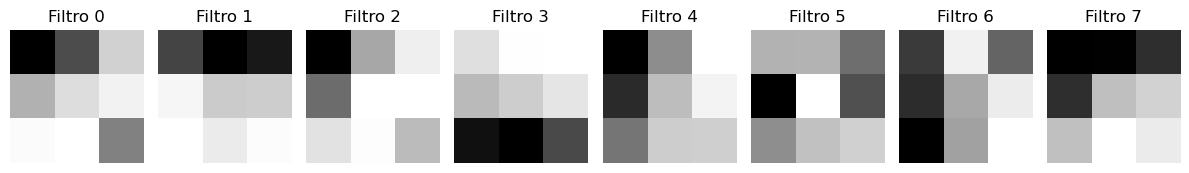

In [26]:
plt.figure(figsize=(12,6))
for i in range(filters.shape[-1]):  # cada filtro
    f = filters[:, :, 0, i]

    # Plot filtro
    plt.subplot(2, filters.shape[-1], i+1)
    plt.imshow(f, cmap="gray")
    plt.axis("off")
    plt.title(f"Filtro {i}")

plt.tight_layout()
plt.show()

# Ejemplo de una convolucion con una imagen.

In [27]:
img = X_test[0:1]

In [29]:
first_layer = model.layers[1]
first_layer

In [ ]:

activation_model = tf.keras.Model(inputs = model.input, outputs = first_layer.output)

activations = activation_model.predict(img)
activations.shape

1/1 [==============================] - 0s 127ms/step


(1, 26, 26, 8)

1/1 [==============================] - 0s 15ms/step
Forma de la activación: (1, 26, 26, 8)


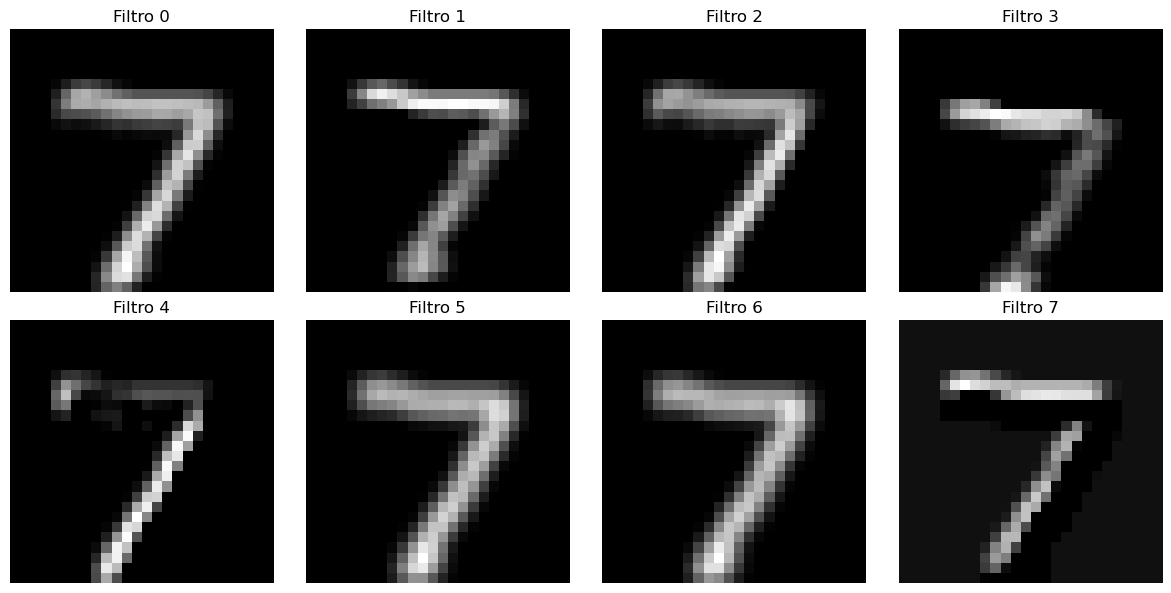

In [30]:
activations = activation_model.predict(img)

print("Forma de la activación:", activations.shape)

plt.figure(figsize=(12,6))
for i in range(activations.shape[-1]):
    plt.subplot(2, 4, i+1)
    plt.imshow(activations[0,:,:,i], cmap="gray")
    plt.axis("off")
    plt.title(f"Filtro {i}")

plt.tight_layout()
plt.show()

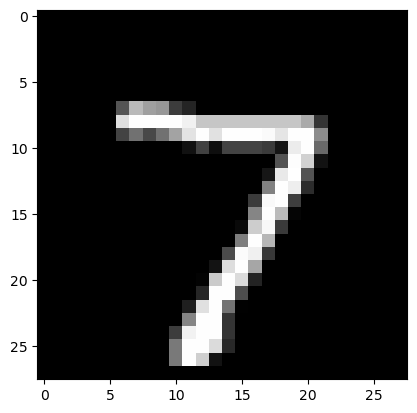

In [31]:
plt.imshow(img[0], cmap="gray")